# What Is Seaborn?

Seaborn is a Python visualization library based on matplotlib. 

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumP. Because Seaborn Python is built on top of Matplotlib, the graphics can be further tweaked using Matplotlib tools and rendered with any of the Matplotlib backends to generate publication-quality figures.  

# Why Should I Care?

 It provides a high-level interface for drawing **attractive** statistical graphics. I meannnnn, look at the this:
 
![Image of Kdeplot](https://seaborn.pydata.org/_images/cubehelix_palette.png)

# But First...

### Import Libraries

In [4]:
import scipy
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

### Data Dictionary

Why are we working with this data?

It's a great dataset to work with if you are new to data science and machine learning. 

```
Source: data dictionary https://www.kaggle.com/c/titanic/data

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

### Loading & Examining Dataset

In [5]:
titanic = pd.read_csv('../../bf_nielsen/sns/titanic.csv')
print('Dimensions of the data:', titanic.shape)

Dimensions of the data: (891, 12)


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Summary Statistics 

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# define columns groups
categorical_vars = ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'cabin']
text_vars = ['name', 'ticked']
numerical_vars = ['age', 'fare']

### Data Imputation & Missing Values

In [11]:
#examine data types & instance counts
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
# how many NaN values there are in each column
len(titanic) - titanic.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# drop NA 
titanic.dropna(axis=1).head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


### Feature Engineering
Often times you will need to apply some custom transformation to a column inorder to update it's contents or to feature engineer a new column. You will find the `apply` function as one of the most powerful tools available in Pandas. `apply` allows you to either use Python's built in functions or to create your own custom functions and run it across a column or data frame.

In [14]:
# before 
titanic["Embarked"].head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [15]:
def get_city_name(city_code):
    if (city_code == "C"):
        return "Cherbourg"
    elif (city_code == "S"):
        return "Southampton"
    elif (city_code == "Q"):
        return "Queenstown"
    
titanic["Embarked"].apply(get_city_name).head(10)

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
5     Queenstown
6    Southampton
7    Southampton
8    Southampton
9      Cherbourg
Name: Embarked, dtype: object

In [16]:
# in order to save your changes you'll need to assign it to an existing or new column name
titanic["embarked_full_city"] = titanic["Embarked"].apply(get_city_name).head(10)

In [17]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_full_city
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton


You can also use the `apply` function, but this time using a lambda expression. Lambda expressions allow you to create functions on the fly. This means you can create a function when you need it and then apply that to the relevant data set. For example, say you wanted to adjust the fare price to inflation, assuming an inflation rate of 100.

In [18]:
# update fares for all the passengers
#titanic["Fare"].apply(lambda fare: 100 * fare).head(5)
titanic.apply(lambda row: 100 * row.Fare, axis=1).head(5)

0     725.00
1    7128.33
2     792.50
3    5310.00
4     805.00
dtype: float64

### Dealing with Outliers
**Standard deviation** is a reflection of the amount of variability within a given data set.

**Z-score** is the number of standard deviations a given data point lies from the mean. To calculate Z-score, substract the mean from each data point and divide the result by the standard deviation. 

For data points that are below the mean, the Z-score is negative. In most large data sets, 99% of values have a Z-score between -3 and 3, meaning they lie within three standard deviations above and below the mean.

In [19]:
titanic[np.abs(titanic.Fare-titanic.Fare.mean()) <= (3*titanic.Fare.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_full_city
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Queenstown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Southampton
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Southampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Southampton
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Cherbourg


### Correlations Between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together. The most common method for calculating correlation is Pearson’s Correlation Coefficient (assumes normal distribution). A correlation of -1 or 1 shows a full negative or positive correlation respectively, while a value of 0 shows no correlation at all.

In [20]:
def is_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [21]:
titanic[['Age', 'Sex']].head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


In [22]:
titanic['person'] = titanic[['Age', 'Sex']].apply(is_child, axis=1)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_full_city,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton,male


In [23]:
titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [24]:
titanic.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [25]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Now Onto The Visualizations!!! 

![Graph Gif](https://i.imgur.com/CDEzasK.gif)

## Visualizing Correlation: Correlation Heat Map (sns.heatmap)

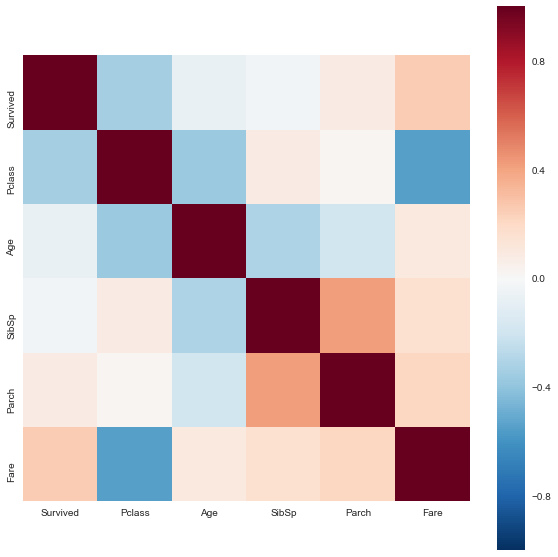

In [26]:
corr = titanic.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True)
sns.plt;

## Visualizing Linear Relationships: Linear Regression Models (sns.regplot)

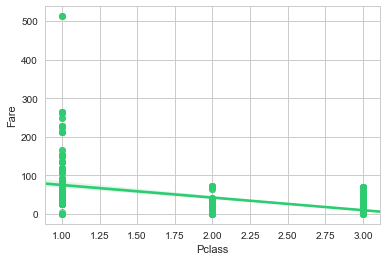

In [33]:
sns.regplot(x = 'Pclass', y = 'Fare', data = titanic, color = '#2ecc71');

# Visualizing Distributions With Respect To Categories: Boxplot (sns.boxplot)

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

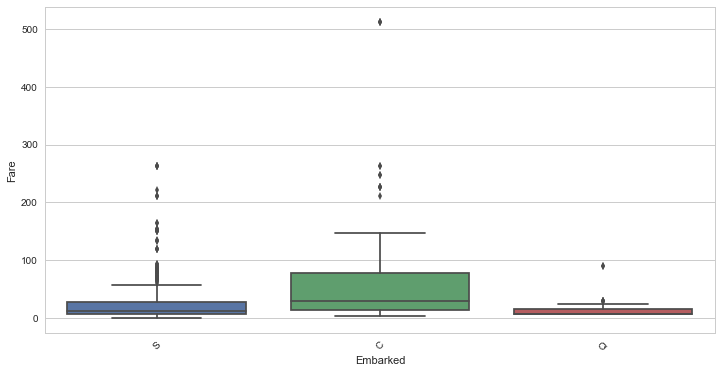

In [199]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Embarked', y = 'Fare',  data = titanic)
xt = plt.xticks(rotation=45)

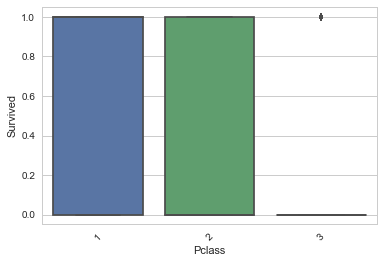

In [200]:
sns.boxplot(x = 'Pclass', y = 'Survived',  data = titanic)
xt = plt.xticks(rotation=45)

# Visualizing Categorical Data: Factorplot (sns.factorplot)
 There is also the higher-level factorplot(), which combines these functions with a FacetGrid to apply a categorical plot across a grid of figure panels.

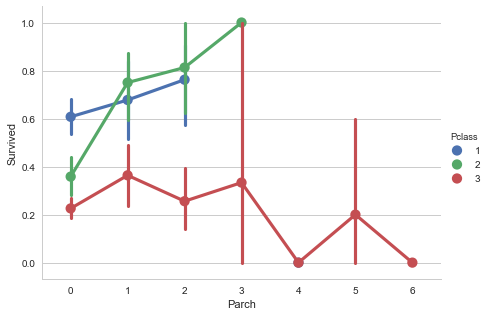

In [201]:
sns.factorplot('Parch', 'Survived', hue = 'Pclass', estimator = np.mean, data = titanic, 
             size = 4.5, aspect = 1.4);

# Visualizing Categorical Data: Pointplot (sns.pointplot)

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

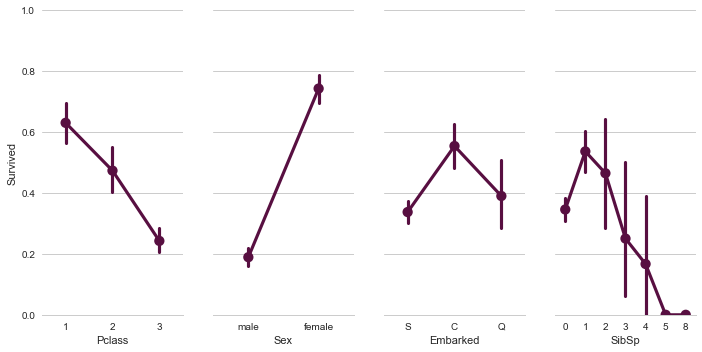

In [202]:
# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="Survived",
                 x_vars=["Pclass", "Sex", "Embarked", "SibSp"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

# More Examples Of Factorplots!!!
Instead of using groupby and count you can use seaborn to visualize counts across categoricals

In [203]:
# Number of passengers in each class
titanic.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

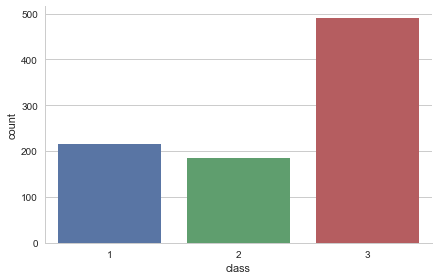

In [204]:
# plot the count of passengers in each class
fg = sns.factorplot('Pclass', data=titanic, kind='count', aspect=1.5)
fg.set_xlabels('class')

In [205]:
titanic.groupby(['Age', 'Sex']).count().head()

,,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_full_city,person
Age,Sex,,,,,,,,,,,,
0.42,male,1,1,1,1,1,1,1,1,0,1,0,1
0.67,male,1,1,1,1,1,1,1,1,0,1,0,1
0.75,female,2,2,2,2,2,2,2,2,0,2,0,2
0.83,male,2,2,2,2,2,2,2,2,0,2,0,2
0.92,male,1,1,1,1,1,1,1,1,1,1,0,1


In [206]:
titanic.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

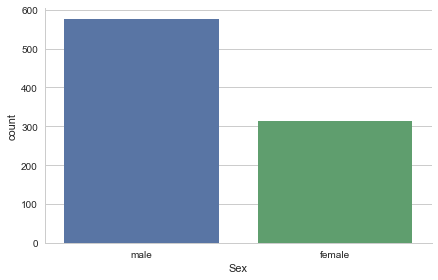

In [207]:
# use seaborn to plot the number of males and females instead of groupby
sns.factorplot('Sex', data=titanic, kind='count', aspect=1.5)

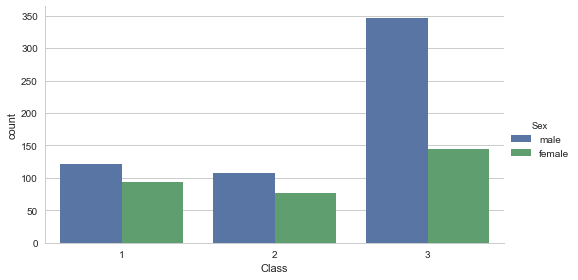

In [208]:
# group by Sex and class
g = sns.factorplot('Pclass', data=titanic, hue='Sex', kind='count', aspect=1.75)
g.set_xlabels('Class')

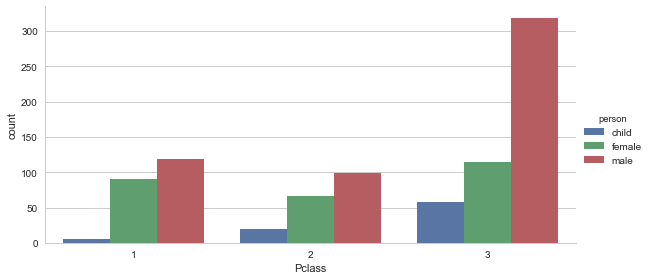

In [209]:
# Factorplot of passengers splitted into sex, children and class
sns.factorplot('Pclass', data=titanic, kind='count', hue='person', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=2)

# Visualizing Distributions: Distplot (sns.distplot)

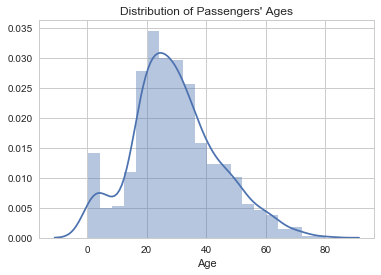

In [210]:
age_dist = sns.distplot(titanic.Age.dropna())
age_dist.set_title("Distribution of Passengers' Ages")

# Visualizing Distributions: FacetGrid (FacetGrid), Kdeplot (sns.kdeplot)


#### Grouped by Gender

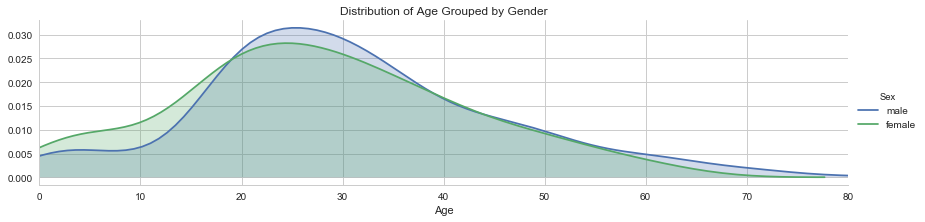

In [211]:
fig = sns.FacetGrid(titanic, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

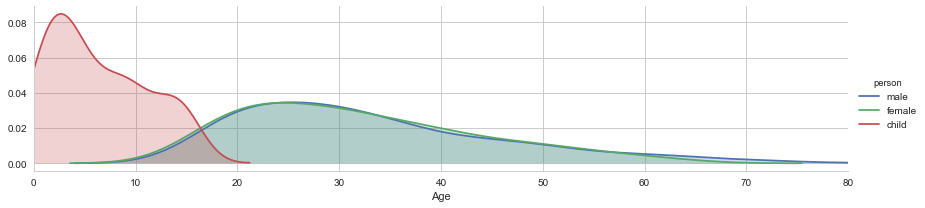

In [212]:
fig = sns.FacetGrid(titanic, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

# Visualizing Distributions: Swarmplot (sns.swarmplot)
Drawing a categorical scatterplot with non-overlapping points.

This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).


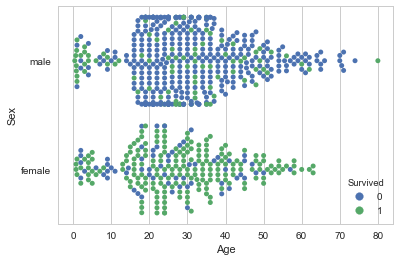

In [213]:
sns.swarmplot(x='Age',y='Sex',hue='Survived',data=titanic)

# Visualizing Distributions: Violinplot (sns.violinplot)


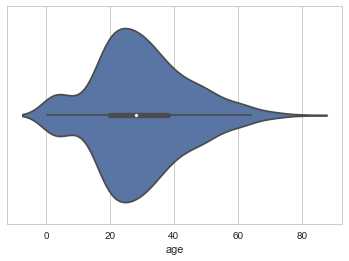

In [221]:
titanic = sns.load_dataset("titanic")
ax = sns.violinplot(x=titanic["age"])

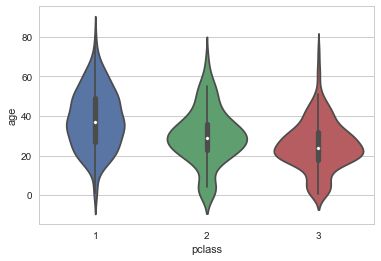

In [225]:
ax = sns.violinplot(x="pclass", y="age", data=titanic)


# End




































#### Where did passengers on-board from

Nearly all passengers from Queenstown were in third class, while Cherbourg were in first class.

In [223]:
sns.factorplot('Embarked', data=titanic, kind='count', hue='Pclass', hue_order=range(1,4), aspect=2, order = ['C','Q','S'])

ValueError: Could not interpret input 'Embarked'

In [224]:
titanic.Embarked.head(10)

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [ ]:
# tabulated values... use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[titanic.Survived], columns=[titanic.Embarked])
port.columns = [['cherbourg','queenstown','southampton']]
port

In [ ]:
port = pd.crosstab(index=[titanic.Pclass], columns=[titanic.Embarked])
port.columns = [['cherbourg','queenstown','southampton']]
port

## Pivot Tables

In [ ]:
titanic.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

In [ ]:
titanic.pivot_table(values = ['Survived'], index=['Pclass', 'Sex'], aggfunc=[np.mean,len], margins=True)

In [ ]:
titanic.pivot_table(index=['Survived', 'Pclass', 'Sex'], aggfunc=[np.sum,len], margins=True)

Note: 
+ Columns are optional - they provide an additional way to segment the actual values you care about. The aggregation functions are applied to the values you list.

+ fill_value to set NaN to 0

## Target Analysis

In [ ]:
sns.factorplot('Survived', data=titanic, kind='count')

Sex vs Survival Rate

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic)

In [ ]:
age = titanic[['Age','Survived', 'Sex']].copy()
age.loc[age.Age<14,'agegroup'] = 'Children'
age.loc[age.Age>=14,'agegroup'] = 'Adult'
sns.barplot(x='agegroup', y='Survived', hue='Sex', data=age)

In [ ]:
sns.swarmplot(x='Age',y='Sex',hue='Survived',data=titanic)

#### Social class and the survival rate

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)

#### Increased chances of survival for both males & females if they paid more

In [ ]:
amount_paid = titanic[['Fare','Survived', 'Sex','Pclass']].copy()
amount_paid.loc[amount_paid.Fare>30,'farelabel'] = 'Expensive'
amount_paid.loc[amount_paid.Fare<30,'farelabel'] = 'Cheap'
sns.barplot(x='farelabel', y='Survived', hue='Sex', data=amount_paid)

The chances of a female passenger surviving does not change if there are up to 3 relatives on board while chances drop for more than 3 relatives. 

The chances for male passangers increase as the number of relatives on board increses (also up to 3). For more them 3 relatives the chances of survival also drop.

In [ ]:
family = titanic[['SibSp','Parch','Survived', 'Sex']].copy()
family.loc[:,'family_size'] =  family['SibSp'] + family['Parch'] +1
family.loc[family.family_size==1,'family_label'] = 'Single'
family.loc[family.family_size==2,'family_label'] = 'Couple'
family.loc[(family.family_size>2)&(family.family_size<=4),'family_label'] = 'Small'
family.loc[family.family_size>4,'family_label'] = 'Big'
sns.barplot(x='family_label', y='Survived', hue='Sex', data=family, order=['Single', 'Couple', 'Small', 'Big'])

#### Comparing Embarked and Pclass by the proportion of Survived

In [ ]:
sns.pointplot(x="Embarked", y="Survived", hue="Pclass", data=titanic)

#### Age, Pclass interaction paired by Survived

In [ ]:
sns.factorplot(x="Pclass", y="Age", hue="Survived", data=titanic, kind="box")

#### Fare by Pclass and Survived
Seems like fare can help explain survival for Class 1 passengers. What do you notice about the distribution of the data (skewed)?

In [ ]:
sns.factorplot(x="Pclass", y="Fare", hue="Survived", data=titanic[titanic.Fare < 200], kind="box")

In [ ]:
# after applying log transformation 
titanic.loc[:,'Logfare'] = np.log1p(titanic.Fare)
sns.factorplot(x="Pclass", y="Logfare", hue="Survived", data=titanic, kind="box")

## Conclusions

+ More men died, more women and children were rescued.
+ Most third class passengers didn’t survive.
+ Passengers without family on-board (i.e neither siblings nor parents/children ) had low survival rate.
+ Passengers from Cabin class C,E,B and D survived more because they were 1st class passengers.